## OpenCV
# Yolo v3 적용
- 소스 : https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/
- 모델 다운로드 : https://pjreddie.com/darknet/yolov2/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
classes_80 = ["person", "bicycle", "car", "motorcycle",
            "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
            "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
            "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
            "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis",
            "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
            "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife",
            "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",
            "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table",
            "toilet", "tv", "laptop", "mouse", "remote", "keyboard",
            "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
            "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush" ]

### yolo 모델 불러오기

In [3]:
config = 'opencv_dnn/yolov3.cfg'
model = 'opencv_dnn/yolov3.weights'

yolo = cv2.dnn.readNet(model, config)
    # cv2.dnn.readNetFromDarknet() 과는 인자 순서가 틀림
    # readNet() 함수는 readNetFromDarknet() 을 호출함 (help 내용 참조)

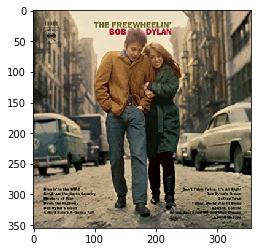

In [4]:
image = cv2.imread('bob.jpg')
plt.imshow(image[:,:,[2,1,0]])

In [7]:
blob = cv2.dnn.blobFromImage(image, 1.0/255.0, (416, 416), swapRB=True, crop=False)

In [8]:
yolo.setInput(blob) # 이미지 설정

### yolo v3 의 출력레이어는 3개임
- 해당 출력레이어 이름을 알아내어, forward() 함수의 인자로 전달한다
- forward() 의 출력은 리스트로서 각 레이어의 판정결과이다

In [26]:
layer_names = yolo.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]

In [35]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [27]:
pred = yolo.forward(output_layers) # 길이가 3인 리스트

In [34]:
pred[0].shape, pred[1].shape, pred[2].shape

((507, 85), (2028, 85), (8112, 85))

In [36]:
pred[0][0]

array([4.5392852e-02, 5.3690858e-02, 4.4921848e-01, 1.2925050e-01,
       7.4486827e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [37]:
pred[0][:,4].argsort()[-1:-11:-1] # 다섯번째 칼럼이 해당 박스에 사물이 존재할 확률임

array([256, 250, 304, 276, 295, 303, 315, 306, 307, 289], dtype=int64)

In [38]:
pred[0][256]

array([0.5792591 , 0.521988  , 0.18582177, 0.8602988 , 0.999607  ,
       0.9995943 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### 첫번째 사물 출력

In [39]:
cx = pred[0][256,0]*355 # 원본 이미지의 폭이 355
cy = pred[0][256,1]*355 # 원본 이미지의 높이가 355
w = pred[0][256,2]*355
h = pred[0][256,3]*355
cx,cy,w,h

(205.63697963953018, 185.30573099851608, 65.96672892570496, 305.4060783982277)

In [40]:
left = int(cx-w/2)
right = int(cx+w/2)
top = int(cy-h/2)
bottom = int(cy+h/2)
left, right, top, bottom

(172, 238, 32, 338)

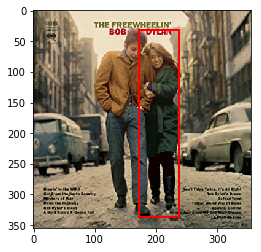

In [41]:
plt.imshow(image[:,:,[2,1,0]])
plt.gca().add_patch(
    plt.Rectangle((left, top), w, h, linewidth=2, edgecolor='r', facecolor='none'))

### 모든 사물 표시

0 person 0.9994958
0 person 0.9995943
7 truck 0.5221112
2 car 0.9393346
5 bus 0.6763823
0 person 0.87816936
7 truck 0.5116065
2 car 0.73513263
67 cell phone 0.44329134


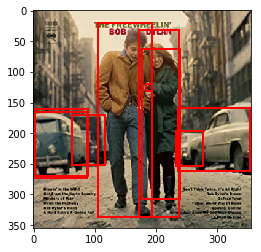

In [44]:
plt.imshow(image[:,:,[2,1,0]])

for layer in pred:
    for obj in layer:
        confidence = obj[4]
        no = obj[5:].argmax()
        prob = obj[5+no]
        score = prob #score = confidence*prob (v3 스텍 확인 필요)

        if score>0 : # 경계값
            print(no, classes_80[no], score)

            cx = obj[0]*image.shape[1]
            cy = obj[1]*image.shape[0]
            w = obj[2]*image.shape[1]
            h = obj[3]*image.shape[0]

            left = int(cx-w/2)
            top = int(cy-h/2)

            plt.gca().add_patch(
                plt.Rectangle((left, top), w, h, linewidth=2, edgecolor='r', facecolor='none'))

### NMS 적용

In [53]:
class_ids = []
confidences = []
boxes = []

for layer in pred:
    for obj in layer:
        scores = obj[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence>0 : # 경계값
            print(class_id, classes_80[class_id], confidence)

            cx = obj[0]*image.shape[1]
            cy = obj[1]*image.shape[0]
            w = obj[2]*image.shape[1]
            h = obj[3]*image.shape[0]

            x = int(cx - w / 2)
            y = int(cy - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

0 person 0.9994958
0 person 0.9995943
7 truck 0.5221112
2 car 0.9393346
5 bus 0.6763823
0 person 0.87816936
7 truck 0.5116065
2 car 0.73513263
67 cell phone 0.44329134


In [54]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.4)

In [57]:
indexes

array([[1],
       [0],
       [3],
       [7],
       [4],
       [6],
       [8]], dtype=int32)

In [58]:
indexes = indexes.ravel()

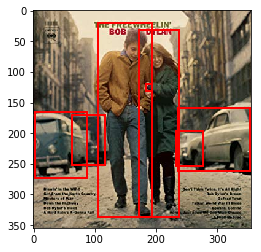

In [59]:
plt.imshow(image[:,:,[2,1,0]])

for i in indexes:
    x, y, w, h = boxes[i]
    plt.gca().add_patch(
        plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))